# BIOEE 4940 : **Introduction to Quantitative Analysis in Ecology**
### ***Spring 2021***
### Instructor: **Xiangtao Xu** ( ✉️ xx286@cornell.edu)
### Teaching Assistant: **Yanqiu (Autumn) Zhou** (✉️ yz399@cornell.edu)

---

## <span style="color:royalblue">Lecture 11</span> *Special Topics on Spatial and Temporal Data*


#### 1. Storing and Accessing Spatial and Temporal Data

* NetCDF (Network Common Data Form)

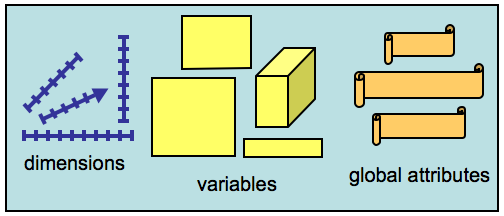

NetCDF (Network Common Data Form) is a set of software libraries and machine-independent data formats that support the creation, access, and sharing of array-oriented scientific data. (https://www.unidata.ucar.edu/software/netcdf/)

* HDF5 (Hierarchical Data Format)

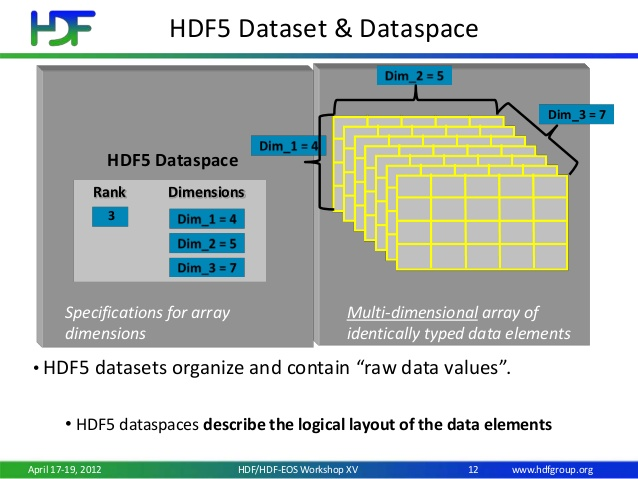

Hierarchical Data Format (HDF) is a set of file formats (HDF4, HDF5) designed to store and organize large amounts of data.

* NetCDF Version 4.0 (released in 2008) allowed the use of the HDF5 data file format.

* Packages/Libraries in Python/R
    * NetCDF4, h5py in Python (pandas and xarray also supports I/O with netcdf and hdf formats)
    * ncdf4 in R


* **xarray** (http://xarray.pydata.org/en/stable/)

    Multi-dimensional labeled arrays and datasets in Python. In some sense, a N-dimensional version of Pandas
    
    Key ideas:
    
    * a *DataArray* is a N-D generalization of Pandas Series. Each dimension has corresponding coordinates
    * a *DataSet* is a set of DataArray that (partly) shares coordinates/dimensions
    * provide user-friendly high-level utility functions like Pandas
    
    
* Why xarray?

A real-world problem: In Homework 3, we are going to use multi-years of remote sensing data over a landscape (two spatial dimensions, one temporal dimension). Each remote sensing observation has multiple bands (e.g. Red, Green, Blue, Near-Infrared etc.). How would you store the data for easy and rapid analysis?

In [1]:
# start with a simple excercise to store one .tif file into xarray
import numpy as np
import xarray as xr
import rasterio

# read the first tif file
year, month = 2019, 1
tif_name = f'./data/Sentinel_PV_{year:04d}-{month:02d}.tif'
        
src = rasterio.open(tif_name, 'r')
im = src.read()
# read image into ndarray

# transpose the array from (band, row, col) to (row, col, band)
im = np.transpose(im, [1,2,0])

print(im.shape)

# index of relevant band
Iblu, Igrn, Ired, Inir = 1,2,3,7

im = im[:,:,[Iblu, Igrn, Ired, Inir]]

bands = ['Blue','Green','Red','NIR']

# spatial coordinate of the data
print(src.bounds)
# first axis, from north to south
lat_array = np.linspace(src.bounds[3],src.bounds[1],im.shape[0])
# second axis, from west to east
lon_array = np.linspace(src.bounds[0],src.bounds[2],im.shape[1])

# close the .tif file
src.close()

# create a xarray DataArray

da = xr.DataArray(im,coords=[lat_array,lon_array,bands],dims=['lat','lon','band'])

da

(102, 102, 23)
BoundingBox(left=-85.37507611896362, bottom=10.340417403971399, right=-85.3659133030656, top=10.349580219869418)


<xarray.DataArray (lat: 102, lon: 102, band: 4)>
array([[[0.0271 , 0.04575, 0.04065, 0.1964 ],
        [0.03295, 0.05725, 0.04945, 0.2433 ],
        [0.03115, 0.06005, 0.0498 , 0.2684 ],
        ...,
        [0.02135, 0.0463 , 0.0312 , 0.2477 ],
        [0.0188 , 0.03995, 0.02705, 0.2384 ],
        [0.02265, 0.04465, 0.0318 , 0.2605 ]],

       [[0.0291 , 0.05505, 0.04295, 0.2458 ],
        [0.03485, 0.05915, 0.04895, 0.2632 ],
        [0.03075, 0.05845, 0.04835, 0.2646 ],
        ...,
        [0.01995, 0.0427 , 0.0291 , 0.2557 ],
        [0.0193 , 0.0391 , 0.0282 , 0.2435 ],
        [0.02205, 0.0439 , 0.0292 , 0.265  ]],

       [[0.02605, 0.0539 , 0.0368 , 0.2769 ],
        [0.02515, 0.05115, 0.0387 , 0.2704 ],
        [0.02905, 0.0537 , 0.04515, 0.2543 ],
        ...,
...
        ...,
        [0.02315, 0.0406 , 0.03215, 0.2278 ],
        [0.0337 , 0.05815, 0.05035, 0.2574 ],
        [0.0429 , 0.07205, 0.0782 , 0.2453 ]],

       [[0.08175, 0.123  , 0.1731 , 0.3242 ],
        [0.0841 , 0.1246 , 0.1748 , 0.3273 ],
        [0.08355, 0.1256 , 0.1771 , 0.3318 ],
        ...,
        [0.02565, 0.0469 , 0.0379 , 0.2623 ],
        [0.0417 , 0.0682 , 0.0673 , 0.2579 ],
        [0.05125, 0.08035, 0.09475, 0.2311 ]],

       [[0.08305, 0.1204 , 0.1679 , 0.3233 ],
        [0.0829 , 0.1221 , 0.1736 , 0.3228 ],
        [0.084  , 0.1238 , 0.1749 , 0.324  ],
        ...,
        [0.0318 , 0.0546 , 0.0507 , 0.2544 ],
        [0.05035, 0.07395, 0.08405, 0.2449 ],
        [0.0571 , 0.08115, 0.1057 , 0.2246 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 10.35 10.35 10.35 10.35 ... 10.34 10.34 10.34 10.34
  * lon      (lon) float64 -85.38 -85.37 -85.37 -85.37 ... -85.37 -85.37 -85.37
  * band     (band) <U5 'Blue' 'Green' 'Red' 'NIR'

In [10]:
# subset a dimension
da.sel(band='Blue')

<xarray.DataArray (lat: 102, lon: 102)>
array([[0.0271 , 0.03295, 0.03115, ..., 0.02135, 0.0188 , 0.02265],
       [0.0291 , 0.03485, 0.03075, ..., 0.01995, 0.0193 , 0.02205],
       [0.02605, 0.02515, 0.02905, ..., 0.021  , 0.01885, 0.0232 ],
       ...,
       [0.08315, 0.0854 , 0.08535, ..., 0.02315, 0.0337 , 0.0429 ],
       [0.08175, 0.0841 , 0.08355, ..., 0.02565, 0.0417 , 0.05125],
       [0.08305, 0.0829 , 0.084  , ..., 0.0318 , 0.05035, 0.0571 ]],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 10.35 10.35 10.35 10.35 ... 10.34 10.34 10.34 10.34
  * lon      (lon) float64 -85.38 -85.37 -85.37 -85.37 ... -85.37 -85.37 -85.37
    band     <U5 'Blue'

In [11]:
# calculate NDVI
NDVI = (da[:,:,3] - da[:,:,2]) / da.sel(band=['Red','NIR']).sum(dim='band')

NDVI

<xarray.DataArray (lat: 102, lon: 102)>
array([[0.6570344 , 0.6621691 , 0.6869893 , ..., 0.77626395, 0.7961951 ,
        0.78241533],
       [0.70251083, 0.68636876, 0.69100493, ..., 0.7956461 , 0.7924181 ,
        0.8014956 ],
       [0.7653809 , 0.74959564, 0.6984471 , ..., 0.791137  , 0.7785173 ,
        0.78286505],
       ...,
       [0.28758433, 0.28627917, 0.29411766, ..., 0.7526448 , 0.67278636,
        0.5165379 ],
       [0.30384076, 0.3037244 , 0.303989  , ..., 0.7475017 , 0.5861009 ,
        0.41844404],
       [0.3163681 , 0.30056408, 0.2988575 , ..., 0.6676499 , 0.4889801 ,
        0.35997579]], dtype=float32)
Coordinates:
  * lat      (lat) float64 10.35 10.35 10.35 10.35 ... 10.34 10.34 10.34 10.34
  * lon      (lon) float64 -85.38 -85.37 -85.37 -85.37 ... -85.37 -85.37 -85.37

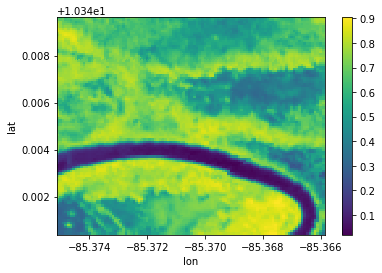

In [12]:
NDVI.plot()

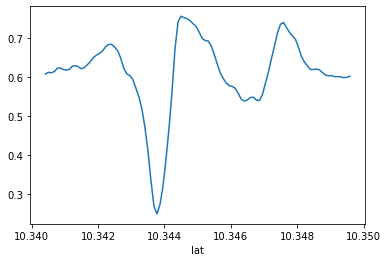

In [15]:
# zonal mean
NDVI.mean(dim='lon').plot()

In [19]:
# normalize each band
da.groupby('band') - da.groupby('band').mean(...)

<xarray.DataArray (lat: 102, lon: 102, band: 4)>
array([[[-0.01047517, -0.01976234, -0.02437631, -0.06715529],
        [-0.00462518, -0.00826234, -0.01557631, -0.02025528],
        [-0.00642517, -0.00546234, -0.01522631,  0.00484473],
        ...,
        [-0.01622517, -0.01921234, -0.03382631, -0.01585528],
        [-0.01877517, -0.02556234, -0.03797631, -0.02515529],
        [-0.01492517, -0.02086234, -0.03322631, -0.00305527]],

       [[-0.00847517, -0.01046234, -0.02207631, -0.01775528],
        [-0.00272517, -0.00636234, -0.01607631, -0.00035527],
        [-0.00682517, -0.00706234, -0.01667631,  0.00104472],
        ...,
        [-0.01762517, -0.02281234, -0.03592631, -0.0078553 ],
        [-0.01827517, -0.02641234, -0.03682631, -0.02005529],
        [-0.01552517, -0.02161233, -0.03582631,  0.0014447 ]],

       [[-0.01152517, -0.01161234, -0.02822631,  0.01334471],
        [-0.01242517, -0.01436234, -0.02632631,  0.0068447 ],
        [-0.00852517, -0.01181234, -0.01987631, -0.00925529],
        ...,
...
        [-0.01442517, -0.02491233, -0.03287631, -0.03575529],
        [-0.00387517, -0.00736234, -0.01467631, -0.00615528],
        [ 0.00532483,  0.00653766,  0.01317368, -0.01825529]],

       [[ 0.04417482,  0.05748767,  0.10807368,  0.06064472],
        [ 0.04652483,  0.05908766,  0.10977368,  0.06374472],
        [ 0.04597482,  0.06008766,  0.11207369,  0.06824473],
        ...,
        [-0.01192517, -0.01861234, -0.02712631, -0.00125527],
        [ 0.00412483,  0.00268766,  0.00227369, -0.00565529],
        [ 0.01367483,  0.01483766,  0.02972369, -0.0324553 ]],

       [[ 0.04547482,  0.05488766,  0.10287368,  0.05974472],
        [ 0.04532483,  0.05658767,  0.10857369,  0.05924472],
        [ 0.04642482,  0.05828767,  0.10987368,  0.06044471],
        ...,
        [-0.00577517, -0.01091234, -0.01432631, -0.00915527],
        [ 0.01277483,  0.00843766,  0.01902369, -0.01865529],
        [ 0.01952483,  0.01563767,  0.04067369, -0.03895529]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 10.35 10.35 10.35 10.35 ... 10.34 10.34 10.34 10.34
  * lon      (lon) float64 -85.38 -85.37 -85.37 -85.37 ... -85.37 -85.37 -85.37
  * band     (band) <U5 'Blue' 'Green' 'Red' 'NIR'

In [22]:
# now let's add a time dimension
da = da.expand_dims('time')

In [24]:
# add time coordinates
da.coords['time'] = [np.datetime64('2019-01-01')]

In [25]:
da

<xarray.DataArray (time: 1, lat: 102, lon: 102, band: 4)>
array([[[[0.0271 , 0.04575, 0.04065, 0.1964 ],
         [0.03295, 0.05725, 0.04945, 0.2433 ],
         [0.03115, 0.06005, 0.0498 , 0.2684 ],
         ...,
         [0.02135, 0.0463 , 0.0312 , 0.2477 ],
         [0.0188 , 0.03995, 0.02705, 0.2384 ],
         [0.02265, 0.04465, 0.0318 , 0.2605 ]],

        [[0.0291 , 0.05505, 0.04295, 0.2458 ],
         [0.03485, 0.05915, 0.04895, 0.2632 ],
         [0.03075, 0.05845, 0.04835, 0.2646 ],
         ...,
         [0.01995, 0.0427 , 0.0291 , 0.2557 ],
         [0.0193 , 0.0391 , 0.0282 , 0.2435 ],
         [0.02205, 0.0439 , 0.0292 , 0.265  ]],

        [[0.02605, 0.0539 , 0.0368 , 0.2769 ],
         [0.02515, 0.05115, 0.0387 , 0.2704 ],
         [0.02905, 0.0537 , 0.04515, 0.2543 ],
         ...,
...
         ...,
         [0.02315, 0.0406 , 0.03215, 0.2278 ],
         [0.0337 , 0.05815, 0.05035, 0.2574 ],
         [0.0429 , 0.07205, 0.0782 , 0.2453 ]],

        [[0.08175, 0.123  , 0.1731 , 0.3242 ],
         [0.0841 , 0.1246 , 0.1748 , 0.3273 ],
         [0.08355, 0.1256 , 0.1771 , 0.3318 ],
         ...,
         [0.02565, 0.0469 , 0.0379 , 0.2623 ],
         [0.0417 , 0.0682 , 0.0673 , 0.2579 ],
         [0.05125, 0.08035, 0.09475, 0.2311 ]],

        [[0.08305, 0.1204 , 0.1679 , 0.3233 ],
         [0.0829 , 0.1221 , 0.1736 , 0.3228 ],
         [0.084  , 0.1238 , 0.1749 , 0.324  ],
         ...,
         [0.0318 , 0.0546 , 0.0507 , 0.2544 ],
         [0.05035, 0.07395, 0.08405, 0.2449 ],
         [0.0571 , 0.08115, 0.1057 , 0.2246 ]]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 10.35 10.35 10.35 10.35 ... 10.34 10.34 10.34 10.34
  * lon      (lon) float64 -85.38 -85.37 -85.37 -85.37 ... -85.37 -85.37 -85.37
  * band     (band) <U5 'Blue' 'Green' 'Red' 'NIR'
  * time     (time) datetime64[ns] 2019-01-01

In [8]:
# loop over all .tifs and combine all data together
years = [2019,2020]
months = range(1,12+1)
da_list = []
# index of relevant band
Iblu, Igrn, Ired, Inir = 1,2,3,7


bands = ['Blue','Green','Red','NIR']

for year in years:
    for month in months:
        tif_name = f'./data/Sentinel_PV_{year:04d}-{month:02d}.tif'
        
        src = rasterio.open(tif_name, 'r')
        im = src.read()
        
        # transpose the array from (band, row, col) to (row, col, band)
        im = np.transpose(im, [1,2,0])

        
        im = im[:,:,[Iblu, Igrn, Ired, Inir]]
        
        im[im == 0.] = np.nan
        
        # first axis, from north to south
        lat_array = np.linspace(src.bounds[3],src.bounds[1],im.shape[0])
        # second axis, from west to east
        lon_array = np.linspace(src.bounds[0],src.bounds[2],im.shape[1])

        src.close()
        
        
        da = xr.DataArray(im,coords=[lat_array,lon_array,bands],dims=['lat','lon','band'])
        
        # add time dimension
        da = da.expand_dims('time')
        da.coords['time'] = [np.datetime64(f'{year:04d}-{month:02d}-01')]
        
        # append the data array to da_list
        
        da_list.append(da)

# concatenate all times together
da_all = xr.concat(da_list,dim='time')



In [9]:
da_all

<xarray.DataArray (time: 24, lat: 102, lon: 102, band: 4)>
array([[[[0.0271 , 0.04575, 0.04065, 0.1964 ],
         [0.03295, 0.05725, 0.04945, 0.2433 ],
         [0.03115, 0.06005, 0.0498 , 0.2684 ],
         ...,
         [0.02135, 0.0463 , 0.0312 , 0.2477 ],
         [0.0188 , 0.03995, 0.02705, 0.2384 ],
         [0.02265, 0.04465, 0.0318 , 0.2605 ]],

        [[0.0291 , 0.05505, 0.04295, 0.2458 ],
         [0.03485, 0.05915, 0.04895, 0.2632 ],
         [0.03075, 0.05845, 0.04835, 0.2646 ],
         ...,
         [0.01995, 0.0427 , 0.0291 , 0.2557 ],
         [0.0193 , 0.0391 , 0.0282 , 0.2435 ],
         [0.02205, 0.0439 , 0.0292 , 0.265  ]],

        [[0.02605, 0.0539 , 0.0368 , 0.2769 ],
         [0.02515, 0.05115, 0.0387 , 0.2704 ],
         [0.02905, 0.0537 , 0.04515, 0.2543 ],
         ...,
...
         ...,
         [0.0193 , 0.0364 , 0.0238 , 0.216  ],
         [0.02095, 0.04695, 0.02715, 0.2835 ],
         [0.0245 , 0.05395, 0.03115, 0.2736 ]],

        [[0.0432 , 0.0651 , 0.0735 , 0.23   ],
         [0.0437 , 0.0664 , 0.0716 , 0.2286 ],
         [0.0422 , 0.0661 , 0.0709 , 0.2368 ],
         ...,
         [0.02055, 0.0415 , 0.02365, 0.2681 ],
         [0.02415, 0.05455, 0.02835, 0.2996 ],
         [0.0242 , 0.05445, 0.0313 , 0.2709 ]],

        [[0.043  , 0.0623 , 0.0696 , 0.2148 ],
         [0.0425 , 0.0633 , 0.0716 , 0.2108 ],
         [0.0399 , 0.0634 , 0.0678 , 0.2154 ],
         ...,
         [0.02165, 0.04315, 0.02465, 0.288  ],
         [0.0244 , 0.0546 , 0.0286 , 0.2896 ],
         [0.02335, 0.0519 , 0.02905, 0.2658 ]]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 10.35 10.35 10.35 10.35 ... 10.34 10.34 10.34 10.34
  * lon      (lon) float64 -85.38 -85.37 -85.37 -85.37 ... -85.37 -85.37 -85.37
  * band     (band) <U5 'Blue' 'Green' 'Red' 'NIR'
  * time     (time) datetime64[ns] 2019-01-01 2019-02-01 ... 2020-12-01

In [12]:
NDVI = (da_all.sel(band='NIR') - da_all.sel(band='Red')) / da_all.sel(band=['Red','NIR']).sum(dim='band')

NDVI


<xarray.DataArray (time: 24, lat: 102, lon: 102)>
array([[[0.6570344 , 0.6621691 , 0.6869893 , ..., 0.77626395,
         0.7961951 , 0.78241533],
        [0.70251083, 0.68636876, 0.69100493, ..., 0.7956461 ,
         0.7924181 , 0.8014956 ],
        [0.7653809 , 0.74959564, 0.6984471 , ..., 0.791137  ,
         0.7785173 , 0.78286505],
        ...,
        [0.28758433, 0.28627917, 0.29411766, ..., 0.7526448 ,
         0.67278636, 0.5165379 ],
        [0.30384076, 0.3037244 , 0.303989  , ..., 0.7475017 ,
         0.5861009 , 0.41844404],
        [0.3163681 , 0.30056408, 0.2988575 , ..., 0.6676499 ,
         0.4889801 , 0.35997579]],

       [[0.52098346, 0.5166724 , 0.5039395 , ..., 0.5795918 ,
         0.60476524, 0.59921026],
        [0.5147493 , 0.53120846, 0.51785713, ..., 0.59762144,
         0.59915465, 0.62533695],
        [0.5820591 , 0.5535081 , 0.52695996, ..., 0.5942968 ,
         0.5523643 , 0.5918901 ],
...
        [0.4344559 , 0.43293253, 0.48714492, ..., 0.75431985,
         0.77522933, 0.7538185 ],
        [0.4294651 , 0.40556717, 0.44380733, ..., 0.7754324 ,
         0.7754655 , 0.76609576],
        [0.44315776, 0.42417175, 0.42590365, ..., 0.80416787,
         0.78090686, 0.7729337 ]],

       [[0.72197956, 0.74436086, 0.8066503 , ..., 0.8982388 ,
         0.8939328 , 0.89110315],
        [0.80011827, 0.7817831 , 0.8061498 , ..., 0.9060627 ,
         0.9080901 , 0.89398867],
        [0.8396724 , 0.81942856, 0.826546  , ..., 0.897894  ,
         0.90604496, 0.9049894 ],
        ...,
        [0.5324596 , 0.5010766 , 0.51041347, ..., 0.8015013 ,
         0.82520515, 0.79557014],
        [0.5156508 , 0.52298474, 0.5391615 , ..., 0.8378749 ,
         0.82710785, 0.7928524 ],
        [0.51054853, 0.49291784, 0.5211864 , ..., 0.8423156 ,
         0.8202388 , 0.8029507 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 10.35 10.35 10.35 10.35 ... 10.34 10.34 10.34 10.34
  * lon      (lon) float64 -85.38 -85.37 -85.37 -85.37 ... -85.37 -85.37 -85.37
  * time     (time) datetime64[ns] 2019-01-01 2019-02-01 ... 2020-12-01

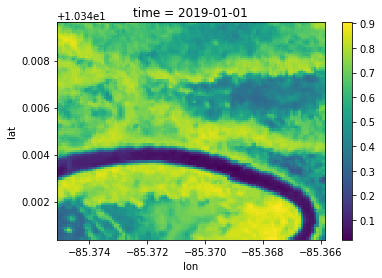

In [13]:
NDVI.sel(time='2019-01-01').plot()

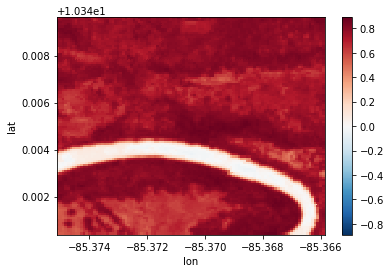

In [14]:
NDVI.median(dim='time').plot()

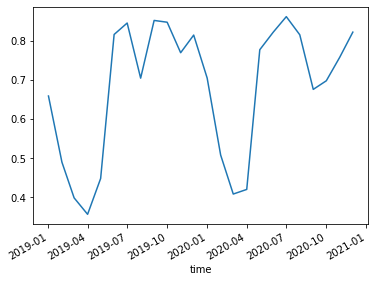

In [15]:
NDVI.median(dim=['lat','lon']).plot()

In [16]:
# save to netcdf file, only 890kB
da_all.name='Sentinel'
da_all.to_netcdf('./pv_rs.nc')

In [17]:
# read netcdf file
da_all = xr.open_dataarray('./pv_rs.nc')

In [18]:
da_all

<xarray.DataArray 'Sentinel' (time: 24, lat: 102, lon: 102, band: 4)>
[998784 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 10.35 10.35 10.35 10.35 ... 10.34 10.34 10.34 10.34
  * lon      (lon) float64 -85.38 -85.37 -85.37 -85.37 ... -85.37 -85.37 -85.37
  * band     (band) object 'Blue' 'Green' 'Red' 'NIR'
  * time     (time) datetime64[ns] 2019-01-01 2019-02-01 ... 2020-12-01

In [20]:
# Calculate different vegetation  index, combine them into a dataset
ds = xr.Dataset(
    {
        'NDVI' : (da_all.sel(band='NIR') - da_all.sel(band='Red')) / da_all.sel(band=['Red','NIR']).sum(dim='band'),
        'NDWI' : (da_all.sel(band='Green') - da_all.sel(band='NIR')) / da_all.sel(band=['Green','NIR']).sum(dim='band'),
        'Raw'  : da_all,
    }
)

ds


<xarray.Dataset>
Dimensions:  (band: 4, lat: 102, lon: 102, time: 24)
Coordinates:
  * lat      (lat) float64 10.35 10.35 10.35 10.35 ... 10.34 10.34 10.34 10.34
  * lon      (lon) float64 -85.38 -85.37 -85.37 -85.37 ... -85.37 -85.37 -85.37
  * time     (time) datetime64[ns] 2019-01-01 2019-02-01 ... 2020-12-01
  * band     (band) object 'Blue' 'Green' 'Red' 'NIR'
Data variables:
    NDVI     (time, lat, lon) float32 0.657 0.6622 0.687 ... 0.8423 0.8202 0.803
    NDWI     (time, lat, lon) float32 -0.6221 -0.619 -0.6343 ... -0.6827 -0.6733
    Raw      (time, lat, lon, band) float32 ...

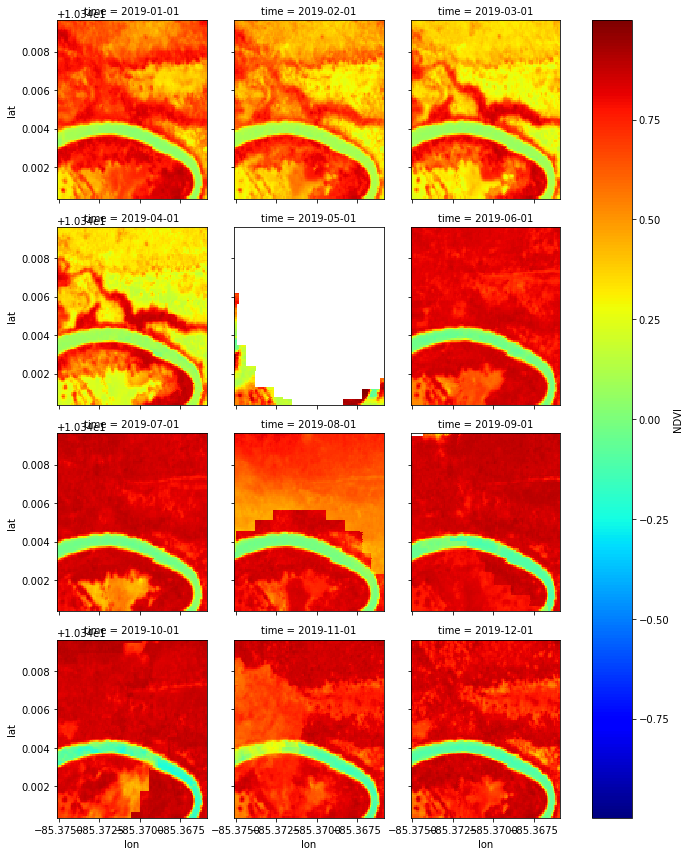

In [26]:
ds.NDVI.sel(time="2019").plot(x='lon',y='lat',col="time",col_wrap=3,cmap='jet')

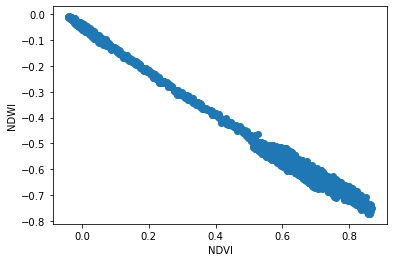

In [31]:
ds[['NDVI','NDWI']].mean(dim='time').plot.scatter(x='NDVI',y='NDWI')

#### 2. Autocorrelation

Let's check the MODIS EVI timeseries for Arnot Forest. What if we shift the timeseries backward for 23 time stamps?

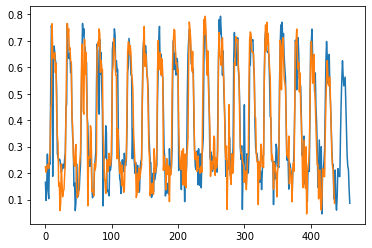

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df_evi = pd.read_csv('../Lecture8/data/arnot_forest_evi.csv')

fig,ax = plt.subplots(1,1)

ax.plot(df_evi.EVI.values)
ax.plot(df_evi.EVI.values[23::])

plt.show()

(0.8915957619038709, 9.220320081263147e-152)


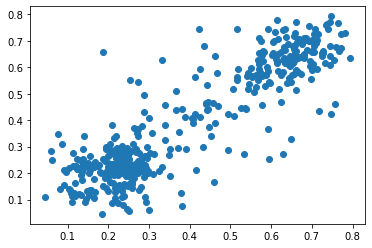

In [11]:
# the EVI timeseries is highly correlated with back-shifted time series
from scipy.stats import pearsonr
plt.scatter(df_evi.EVI.values[0:-23],df_evi.EVI.values[23::])
print(pearsonr(df_evi.EVI.values[0:-23],df_evi.EVI.values[23::]))

**Autocorrelation** is correlation of a *signal* (data series along a certain dimension, most oftenly time) with its delayed copy.

* How to quantify autocorrelation?

Use $X_t$ and $X_{t+k}$ represents two random variables describing a data series, where $X_{t+k}$ denotes the same data after $k$ steps of lag. (e.g. k = 23 in our EVI example above)

**Autocorrelation Coefficient** is defined as $\rho_{X_{t},X_{t+k}} = \frac{E[(X_{t}-\mu_{t})(X_{t+k}-\mu_{t+k})]}{\sigma_{t}\sigma_{t+k}}$

If the process is *stationary*, which means the statistical property does not change with time, the equation can be simplied as $\rho_{X_{t},X_{t+k}} = \frac{E[(X_{t}-\mu)(X_{t+k}-\mu)]}{\sigma^{2}}$

*Autocorrelation function* is sometimes used interchangeably with autocorrelation coefficient. In other cases (i.e. signal processing), autocorrelation function refers to $E[X_{t}(X_{t+k})]$ (i.e. without normalization of the data)

<BarContainer object of 101 artists>

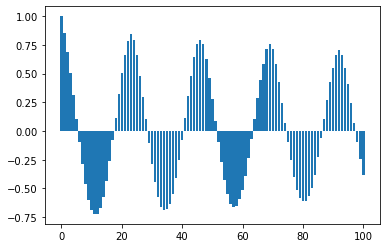

In [15]:
from statsmodels.tsa.stattools import acf

evi_acf = acf(df_evi.EVI.values,nlags=100)

lags = np.arange(100+1)

plt.bar(lags,evi_acf)

* What does autocorrelation imply?

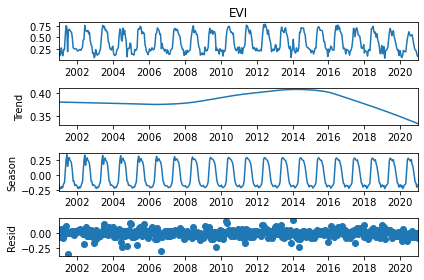

In [24]:
# remove seasonality and trend
from statsmodels.tsa.seasonal import STL

evi = pd.Series(df_evi.EVI.values, index=pd.to_datetime(df_evi.date), name = 'EVI')
stl = STL(evi, period=23,seasonal=23,trend=231)
res = stl.fit()
fig = res.plot()

<BarContainer object of 101 artists>

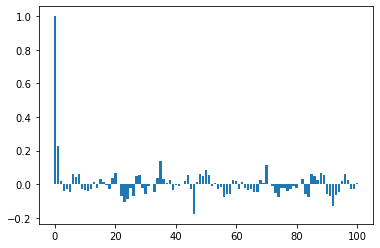

In [25]:
evi_resid = res.resid

acf_val = acf(evi_resid,nlags=100)

lags = np.arange(100+1)

plt.bar(lags,acf_val)

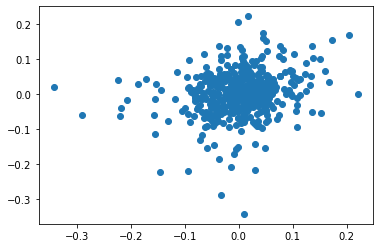

(0.22735391276177308, 8.556846467510822e-07)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     24.91
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           8.56e-07
Time:                        10:35:27   Log-Likelihood:                 615.37
No. Observations:                 459   AIC:                            -1227.
Df Residuals:                     457   BIC:                            -1218.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

In [34]:
plt.scatter(evi_resid[0:-1],evi_resid[1::])
plt.show()
print(pearsonr(evi_resid[0:-1],evi_resid[1::]))

# autoregressive models
import statsmodels.api as sm

res = sm.OLS(evi_resid.values[1::],sm.add_constant(evi_resid.values[0:-1])).fit()
print(res.summary())

* **Spatial Autocorrelation**

Spatial autocorrelation refers to the pattern in which observations from nearby locations are more likely to have similar magnitude than by chance alone.


In [55]:
df_bci = pd.read_excel('../Lecture2/data/bci_census.xlsx')
# subset to 100m by 100m and only include alive trees
df_plot = df_bci.query('(gx < 100) & (gy < 100) & DFstatus == "alive"')



<AxesSubplot:xlabel='gx', ylabel='gy'>

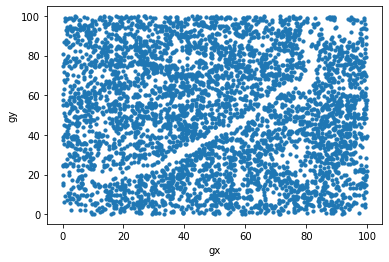

In [56]:
df_plot.plot.scatter(x='gx',y='gy',s=10)

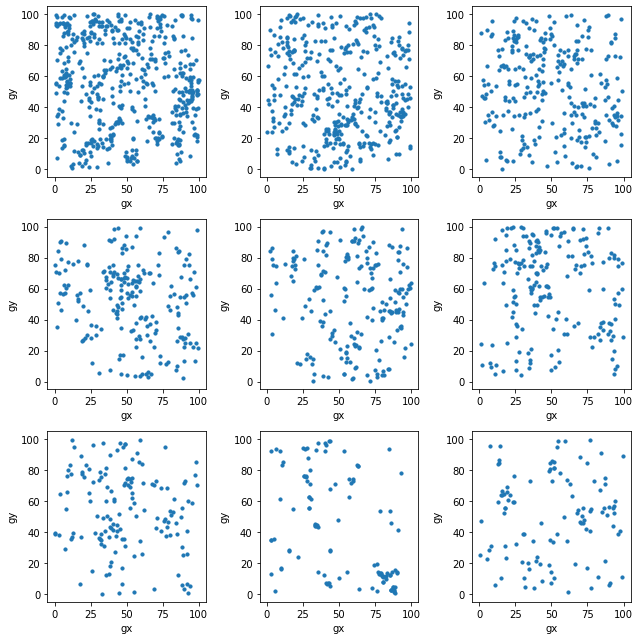

In [58]:
sp_list = df_plot['sp'].value_counts()[0:9].index # top 9 abundant species

fig, axes = plt.subplots(3,3,figsize=(3*3,3*3))
for i, ax in enumerate(axes.ravel()):
    df_plot.query(f'sp == "{sp_list[i]}"').plot.scatter(x='gx',y='gy',s=10,ax=ax)
    ax.set_xlim([-5,105])
    ax.set_ylim([-5,105])

fig.tight_layout()
plt.show()

**Moran's I** is defined as

$I={\frac {N}{W}}{\frac {\sum _{i}\sum _{j}w_{ij}(x_{i}-{\bar {x}})(x_{j}-{\bar {x}})}{\sum _{i}(x_{i}-{\bar {x}})^{2}}}$

where $N$ is the number of spatial units indexed by $i$ and $j$; $x$ is the variable of interest; ${\bar {x}}$ is the mean of $x$; $w_{ij}$ is a matrix of spatial weights with zeroes on the diagonal (i.e., $w_{ii}$=0); and $W$ is the sum of all $w_{ij}$.

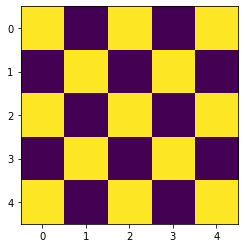

In [77]:
# test

# a perfectly dispersed data
data = np.zeros((5,5))
data[0::2,0::2] = 1
data[1::2,1::2] = 1
plt.imshow(data)

In [81]:
# conda install -c conda-forge pysal

from libpysal.weights import lat2W
from esda.moran import Moran

# create spatial weights
w = lat2W(5,5)

print(w.n)
print(w.neighbors)

m = Moran(data,w)

print(m.I) # perfectly dispersed

/home/xiangtao/programs/miniconda3/lib/python3.8/site-packages/spreg/diagnostics.py:147: RuntimeWarning: divide by zero encountered in true_divide
  tStat = betas[list(range(0, len(vm)))].reshape(len(vm),) / np.sqrt(variance)
/home/xiangtao/programs/miniconda3/lib/python3.8/site-packages/spreg/diagnostics.py:80: RuntimeWarning: divide by zero encountered in double_scalars
  fStat = (U / (k - 1)) / (Q / (n - k))
/home/xiangtao/programs/miniconda3/lib/python3.8/site-packages/spreg/diagnostics.py:390: RuntimeWarning: divide by zero encountered in log
  (n * (np.log(2 * pi)) + n * np.log(utu / n) + (utu / (utu / n)))
/home/xiangtao/programs/miniconda3/lib/python3.8/site-packages/spreg/diagnostics.py:390: RuntimeWarning: invalid value encountered in double_scalars
  (n * (np.log(2 * pi)) + n * np.log(utu / n) + (utu / (utu / n)))
/home/xiangtao/programs/miniconda3/lib/python3.8/site-packages/spreg/diagnostics.py:667: RuntimeWarning: invalid value encountered in double_scalars
  S = mu3 / (m

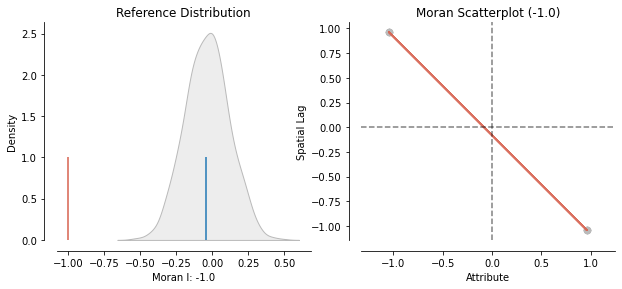

In [82]:
from splot.esda import plot_moran

plot_moran(m, zstandard=True, figsize=(10,4))
plt.show()

0.763888888888889


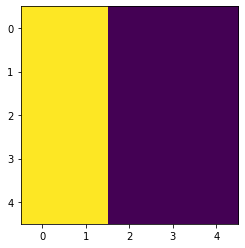

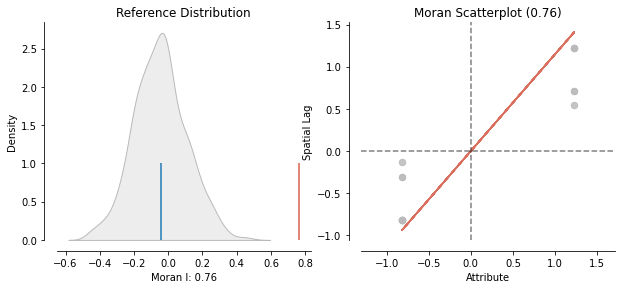

In [84]:
data = np.zeros((5,5))
data[:,0:2] = 1
plt.imshow(data) # clustered

m = Moran(data,w)

print(m.I)
plot_moran(m, zstandard=True, figsize=(10,4))
plt.show()

-0.007867015566290948


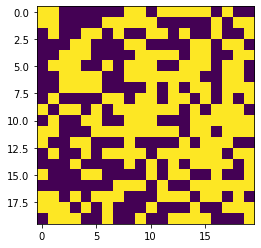

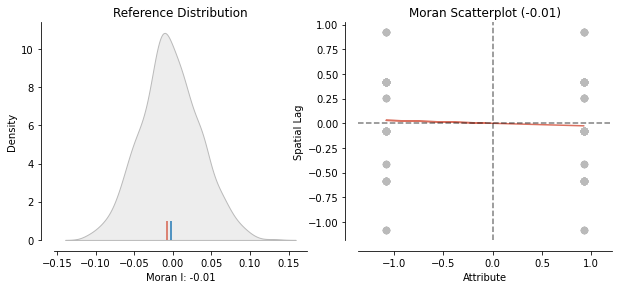

In [88]:
data = np.random.rand(20,20) >= 0.5
w = lat2W(20,20)

plt.imshow(data) # random

m = Moran(data,w)

print(m.I)
plot_moran(m, zstandard=True, figsize=(10,4))
plt.show()

0.0015024552106045006


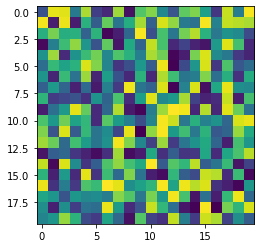

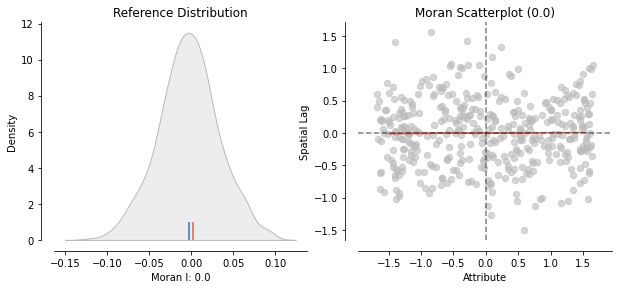

In [89]:
data = np.random.rand(20,20) 
w = lat2W(20,20)

plt.imshow(data) # random

m = Moran(data,w)

print(m.I)
plot_moran(m, zstandard=True, figsize=(10,4))
plt.show()

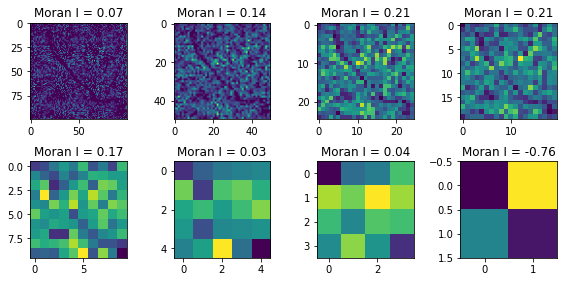

In [95]:
# work with species distribution data
block_size = [1,2,4,5,10,20,25,50]

fig, axes = plt.subplots(2,4,figsize=(4*2,2*2))
for i, ax in enumerate(axes.ravel()):
    block = block_size[i]
    n_block = 100 // block
    block_density = np.zeros((n_block,n_block))
    for k_x in range(n_block):
        gx_ll = k_x * block
        for k_y in range(n_block):
            gy_ll = k_y * block
            
            block_mask = (
                      (df_plot.gx >= gx_ll)
                    & (df_plot.gx < gx_ll + block)
                    & (df_plot.gy >= gy_ll)
                    & (df_plot.gy < gy_ll + block)
                )
            block_density[k_x,k_y] = np.sum(block_mask)
    
    ax.imshow(block_density)
    
    w = lat2W(n_block,n_block)
    m = Moran(block_density,w)
    ax.set_title(f'Moran I = {m.I:4.2f}')

fig.tight_layout()
plt.show()

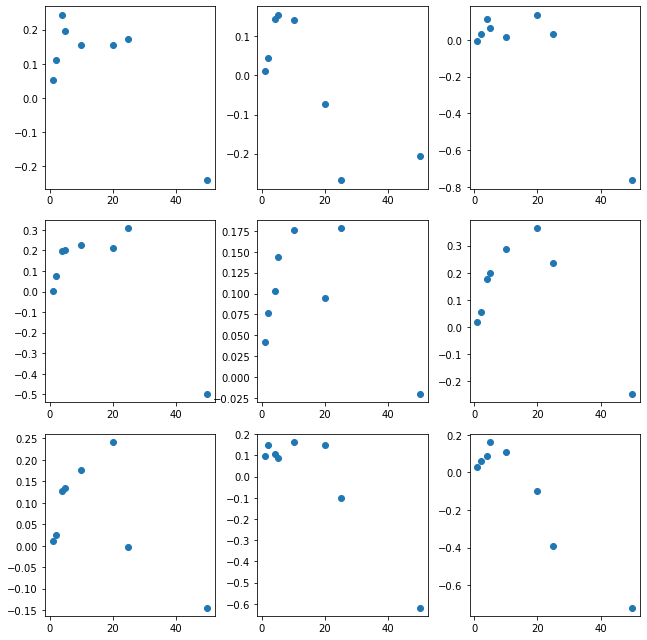

In [97]:
# plot Moran's I as a function of block size for each species
fig, axes = plt.subplots(3,3,figsize=(3*3,3*3))
for i, ax in enumerate(axes.ravel()):
    df_sub = df_plot.query(f'sp == "{sp_list[i]}"')
    MI_array = []
    for j, block in enumerate(block_size):
        
        n_block = 100 // block
        block_density = np.zeros((n_block,n_block))
        for k_x in range(n_block):
            gx_ll = k_x * block
            for k_y in range(n_block):
                gy_ll = k_y * block

                block_mask = (
                          (df_sub.gx >= gx_ll)
                        & (df_sub.gx < gx_ll + block)
                        & (df_sub.gy >= gy_ll)
                        & (df_sub.gy < gy_ll + block)
                    )
                block_density[k_x,k_y] = np.sum(block_mask)

        w = lat2W(n_block,n_block)
        m = Moran(block_density,w)
        MI_array.append(m.I)
        
    ax.scatter(block_size,MI_array)
                
    
fig.tight_layout()
plt.show()

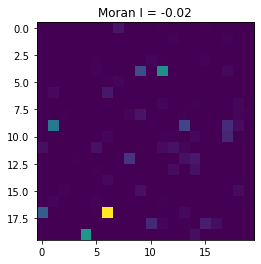

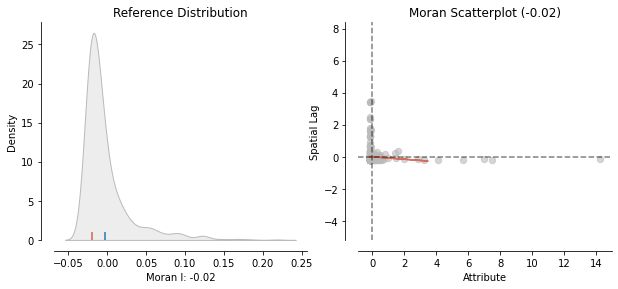

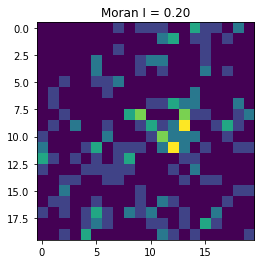

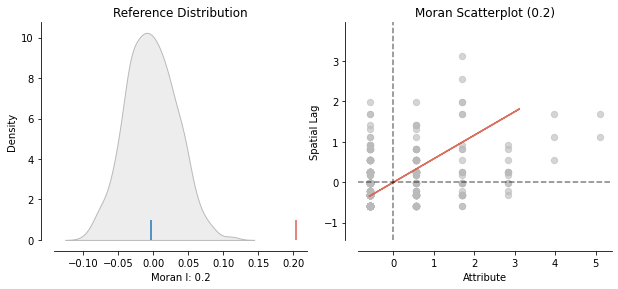

In [140]:
# work with species distribution data
block = 5
df_sub = df_plot.query(f'sp == "{sp_list[3]}"')
n_block = int(100 // block)
block_ba = np.zeros((n_block,n_block))
block_density = np.zeros((n_block,n_block))
for k_x in range(n_block):
    gx_ll = k_x * block
    for k_y in range(n_block):
        gy_ll = k_y * block

        block_mask = (
                  (df_sub.gx >= gx_ll)
                & (df_sub.gx < gx_ll + block)
                & (df_sub.gy >= gy_ll)
                & (df_sub.gy < gy_ll + block)
            )
        block_density[k_x,k_y] = np.nansum(block_mask)
        
        if np.sum(block_mask) > 0: 
            block_ba[k_x,k_y] = np.nansum((df_sub[block_mask].dbh/10.) ** 2) / block ** 2

plt.imshow(block_ba)
    
w = lat2W(n_block,n_block)
m = Moran(block_ba,w)
plt.title(f'Moran I = {m.I:4.2f}')
plt.show()

plot_moran(m, zstandard=True, figsize=(10,4))
plt.show()

fig = plt.figure()
plt.imshow(block_density)
w = lat2W(n_block,n_block)
m = Moran(block_density,w)
plt.title(f'Moran I = {m.I:4.2f}')
plt.show()
    
plot_moran(m, zstandard=True, figsize=(10,4))
plt.show()

In [145]:
# weights based on distance
from libpysal.weights import DistanceBand
points=[((ix+0.5)*block,(iy+0.5)*block) for ix in range(n_block) for iy in range(n_block)]
ba    =[block_ba[ix,iy] for ix in range(n_block) for iy in range(n_block)]
dns   =[block_density[ix,iy] for ix in range(n_block) for iy in range(n_block)]

distance = np.arange(10,70,5.)
ba_MI = np.zeros_like(distance)
dns_MI = np.zeros_like(distance)
for i, d in enumerate(distance):
    dw = DistanceBand(points,threshold=d)
    m = Moran(ba,dw)
    ba_MI[i] = m.I
    
    m = Moran(dns,dw)
    dns_MI[i] = m.I

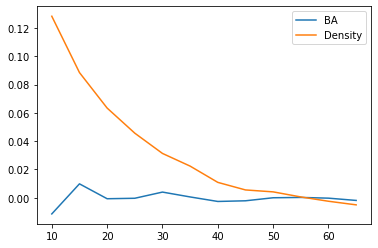

In [146]:
plt.plot(distance,ba_MI,label='BA')
plt.plot(distance,dns_MI,label='Density')
plt.legend()

---
#### Appendix

In [ ]:
# Sentinel data acquisition from GEE
import ee

try:
    ee.Initialize()
except:
    # need to authenticate with your credential at the first time
    ee.Authenticate()
    ee.Initialize()
#import geemap 
import geemap.eefolium as geemap

# to get day number for each month
from calendar import monthrange


# lat and lon for a random place at Palo Verde National Park, Costa Rica
loc = [10.3450, -85.3705]

# identify a 1km buffer around our Point Of Interest (POI)
poi = ee.Geometry.Point(loc[1],loc[0]).buffer(500)


# get Sentinel data
def maskS2clouds(image):
    qa = image.select('QA60')

    # Bits 10 and 11 are clouds and cirrus, respectively.
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11

    # Both flags should be set to zero, indicating clear conditions.
    mask1 = (qa.bitwiseAnd(cloudBitMask).eq(0))
    mask2 = (qa.bitwiseAnd(cirrusBitMask).eq(0))
    mask = mask1.bitwiseAnd(mask2)

    return image.updateMask(mask).divide(10000)



# loop over each month from 2019-2020 to get monthly Sentinel Imagery?
# https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2_SR
years = [2019,2020]
months = range(1,12+1)
for year in years:
    for month in months:
        time_stamp = f'{year:04d}-{month:02d}'
        day_start = 1
        day_end = monthrange(year,month)[1]
        print(year,month,day_start,day_end)
        image =( 
            ee.ImageCollection('COPERNICUS/S2_SR')
                  .filterDate(time_stamp+f'-{day_start:02d}'
                             ,time_stamp+f'-{day_end:02d}')
                  .filterBounds(poi)                      
                  .map(maskS2clouds)
                  .median()
                  .clip(poi.bounds())
                  #.map(lambda img: img.clip(poi.bounds()))

                    )

        out_name = f'./data/Sentinel_PV_{time_stamp}.tif'
        geemap.ee_export_image(image, out_name,scale=10) # 10 meter